## Confidence Intervals & Bootstrapping

Compute confidence/credible intervals based on the four methods above for simulated data sampled from a population that is Gaussian distributed with mean u=10 and standard deviation SD=2, for n=5, 10, 20, 40, 80, 160, 1000 at a 95% confidence level.

In [7]:
#load packages
import numpy as np
import scipy.stats as st
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [5]:
#define constants
mean=10
sd=2
n_list=[5, 10, 20, 40, 80, 160, 1000]

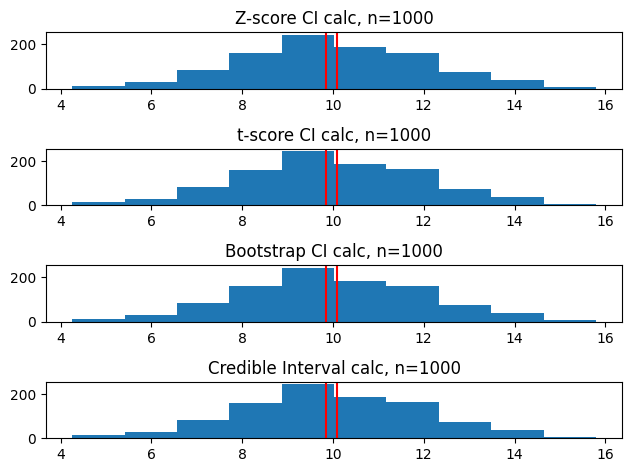

In [48]:
for n in n_list:
    #simulate data
    data=np.random.normal(mean, sd, n)
    sample_mean=np.mean(data)
    
    #METHOD 1
    sem=np.std(data)/np.sqrt(n)
    z=st.norm.ppf((1-0.95)/2) #2 tailed
    ci_lower1= sample_mean + (sem*z)
    ci_upper1= sample_mean - (sem*z)
    
    #plot result
    plt.subplot(411)
    plt.hist(data)
    plt.title(f"Z-score CI calc, n={n}")
    plt.axvline(ci_lower1, color='red', label=ci_lower1)
    plt.axvline(ci_upper1, color='red', label=ci_upper1)
    
    #METHOD 2
    t = st.t.ppf((1-0.95)/2,df=n-1)
    ci_lower2= sample_mean + (sem*t)
    ci_upper2= sample_mean - (sem*t)
    
    #plot result
    plt.subplot(412)
    plt.hist(data)
    plt.title(f"t-score CI calc, n={n}")
    plt.axvline(ci_lower1, color='red', label=ci_lower1)
    plt.axvline(ci_upper1, color='red', label=ci_upper1)
    
    #METHOD 3
    data = (data,)  # samples must be in a sequence
    ci = st.bootstrap(data, np.mean, confidence_level=0.95, n_resamples=1000, method='percentile').confidence_interval
    
    #plot result
    plt.subplot(413)
    plt.hist(data)
    plt.title(f"Bootstrap CI calc, n={n}")
    plt.axvline(ci[0], color='red', label=ci_lower1)
    plt.axvline(ci[1], color='red', label=ci_upper1)
    
    #METHOD 4
    b_mean, b_var, b_std = st.bayes_mvs(data, alpha=0.95)
    
    #plot result
    plt.subplot(414)
    plt.hist(data)
    plt.title(f"Credible Interval calc, n={n}")
    plt.axvline(b_mean.minmax[0], color='red', label=ci_lower1)
    plt.axvline(b_mean.minmax[1], color='red', label=ci_upper1)
    
    #reset
    plt.tight_layout(pad=1.0)
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)